In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_excel('data\combined.xlsx')

In [4]:
df['pop'] = pd.to_numeric(df['pop'])
df['workpop'] = pd.to_numeric(df['workpop'])
print(df.dtypes)

dong        object
pop          int64
workpop      int64
facscore     int64
dtype: object


In [5]:
data_points=df.values[:,1:]
data_points

array([[29081, 1461, 13],
       [358, 3433, 11],
       [6675, 4771, 14],
       [4833, 1279, 4],
       [2040, 2937, 21],
       [5664, 910, 4],
       [6045, 7133, 5],
       [41606, 3490, 111],
       [3346, 5495, 1],
       [3812, 2490, 14],
       [5932, 1689, 13],
       [12113, 1393, 34],
       [29676, 1642, 21],
       [6740, 16635, 57],
       [27897, 1731, 11],
       [8818, 7620, 102],
       [4407, 18263, 30],
       [20480, 3212, 125],
       [2239, 1382, 3],
       [25678, 8689, 28],
       [32040, 2660, 73],
       [7773, 2112, 36],
       [19660, 6919, 257],
       [10739, 2203, 42],
       [7786, 6980, 37],
       [18583, 1439, 6],
       [6949, 2017, 31],
       [19924, 13994, 70],
       [4552, 4943, 28],
       [11457, 34839, 200],
       [5509, 16357, 1],
       [21092, 8363, 38],
       [5140, 10179, 7],
       [3765, 23014, 51],
       [23610, 57177, 44],
       [6615, 4644, 1],
       [19364, 6473, 72],
       [23524, 4627, 95],
       [5224, 8702, 43],
      

In [6]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(data_points)
data_transformed = mms.transform(data_points)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

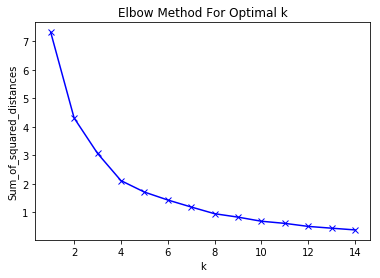

In [8]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
kmeans=KMeans(n_clusters=3).fit(data_points)

In [10]:
kmeans.labels_

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [11]:
df['cluster_id']=kmeans.labels_

In [12]:
df

,dong,pop,workpop,facscore,cluster_id
0,가음정동,29081,1461,13,1
1,가포동,358,3433,11,0
2,경화동,6675,4771,14,0
3,교방동,4833,1279,4,0
4,구산면,2040,2937,21,0
5,구암1동,5664,910,4,0
6,구암2동,6045,7133,5,0
7,내서읍,41606,3490,111,1
8,노산동,3346,5495,1,0
9,대산면,3812,2490,14,0


In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt




x0=[]
y0=[]
z0=[]

x1=[]
y1=[]
z1=[]

x2=[]
y2=[]
z2=[]

x3=[]
y3=[]
z3=[]

for i in range(len(df)):
    if df['cluster_id'][i]==0:
        x0.append(df['pop'][i])
        y0.append(df['workpop'][i])
        z0.append(df['facscore'][i])
    
    elif df['cluster_id'][i]==1:
        x1.append(df['pop'][i])
        y1.append(df['workpop'][i])
        z1.append(df['facscore'][i])
        
    elif df['cluster_id'][i]==2:
        x2.append(df['pop'][i])
        y2.append(df['workpop'][i])
        z2.append(df['facscore'][i])
    
    else:
        x3.append(df['pop'][i])
        y3.append(df['workpop'][i])
        z3.append(df['facscore'][i])

print(x0)
print(y0)
print(z0)

[358, 6675, 4833, 2040, 5664, 6045, 3346, 3812, 5932, 12113, 6740, 8818, 4407, 2239, 7773, 10739, 7786, 6949, 4552, 5509, 5140, 3765, 6615, 5224, 13206, 4884, 7171, 1772, 1675, 1893, 2758, 3378, 5952, 4934, 4047, 8580, 3621, 5952, 4241]
[3433, 4771, 1279, 2937, 910, 7133, 5495, 2490, 1689, 1393, 16635, 7620, 18263, 1382, 2112, 2203, 6980, 2017, 4943, 16357, 10179, 23014, 4644, 8702, 18126, 18567, 1309, 1423, 2672, 2009, 694, 1254, 2343, 1602, 2218, 3593, 6235, 4460, 9073]
[11, 14, 4, 21, 4, 5, 1, 14, 13, 34, 57, 102, 30, 3, 36, 42, 37, 31, 28, 1, 7, 51, 1, 43, 6, 98, 36, 31, 40, 28, 10, 23, 45, 48, 30, 9, 6, 25, 15]


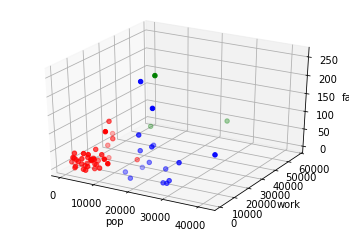

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x0, y0, z0, c='r')
ax.scatter(x1, y1, z1, c='b')
ax.scatter(x2, y2, z2, c='g')
ax.scatter(x3, y3, z3, c='c')

ax.set_xlabel('pop')
ax.set_ylabel('work')
ax.set_zlabel('fac')

plt.show()